# Multiple Person - 2D Pose Estimation in images
- Based on tutorial [Pose Estimation with TensorFlow 2.0](https://medium.com/@gsethi2409/pose-estimation-with-tensorflow-2-0-a51162c095ba)
- Developed after the work of [Ildoo Kim](https://github.com/ildoonet) : [tf-pose-estimation](https://github.com/ildoonet/tf-pose-estimation)

**tf-pose-estimation**<br>
'Openpose', human pose estimation algorithm, have been implemented using Tensorflow. It also provides several variants that have some changes to the network structure for real-time processing on the CPU or low-power embedded devices.

Original Repo(Caffe) : https://github.com/CMU-Perceptual-Computing-Lab/openpose

This Notebook is runing on a Mac (2.9Hhz Quad-Core i7 16GB 2133Mhz RAM)

## Import Libraries

In [1]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

## Suport Functions

In [2]:
def plot_img(image, axis=False, grid=False, showBG = True):
    plt.figure(figsize=(15,8))
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image);
    if grid == True:
        plt.grid();
    if axis == False:       
        plt.axis('off');

In [3]:
def get_human_pose(image_path, showBG = True):
    image = common.read_imgfile(image_path, None, None)
  
    if image is None:
        logger.error('Image can not be read, path=%s' % image)
        sys.exit(-1)

    t = time.time()
    
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    elapsed = time.time() - t

    #logger.info('inference image: %s in %.4f seconds.' % (image, elapsed))
    if showBG == False:
        image = np.zeros(image.shape)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    return image, humans

In [4]:
def show_heatmap(image):
    bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)

    plt.figure(figsize=(15,8))
    plt.imshow(bgimg, alpha=0.5)
    tmp = np.amax(e.heatMat[:, :, :-1], axis=2)
    plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()
    plt.axis('off');

In [5]:
def show_vectormaps(image):
    tmp2 = e.pafMat.transpose((2, 0, 1))
    tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
    tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)
    
    fig = plt.figure(figsize=(20,15))

    a = fig.add_subplot(2, 2, 3)
    a.set_title('Vectormap-x')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()

    a = fig.add_subplot(2, 2, 4)
    a.set_title('Vectormap-y')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()
    plt.show()

In [6]:
def show_keypoints(image, hum, human=1, color='orange', showBG = True):
    if human == 0: human = 1
    num_hum = len(hum)
    keypoints = str(str(str(hum[human-1]).split('BodyPart:')[1:]).split('-')).split(' score=')
    keypoints_list=[]
    for i in range (len(keypoints)-1): 
        pnt = keypoints[i][-11:-1]
        pnt = tuple(map(float, pnt.split(', ')))
        keypoints_list.append(pnt)

    keypts_array = np.array(keypoints_list)
    keypts_array = keypts_array*(image.shape[1],image.shape[0])
    keypts_array = keypts_array.astype(int)
    keypts_array

    plt.figure(figsize=(10,10))
    plt.axis([0, image.shape[1], 0, image.shape[0]])  
    plt.scatter(*zip(*keypts_array), s=200, color=color, alpha=0.6)
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      
    plt.imshow(image)
    ax=plt.gca() 
    ax.set_ylim(ax.get_ylim()[::-1]) 
    ax.xaxis.tick_top() 
    plt.title('Keypoints Person [{}] from {} humans detected\n'.format(human, num_hum))
    plt.grid();

    for i, txt in enumerate(keypts_array):
        ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5))
            
    return keypts_array

## Optional Looger Initialization

In [5]:
logger = logging.getLogger('TfPoseEstimatorRun')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

## Model and TfPose Estimator

In [7]:
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-07-31 17:06:51,873] [TfPoseEstimator] [INFO] loading graph from /Users/mjrovai/Dropbox/2020/10_Data_Science/50_Computer_Vision/30_Pose_Estimation/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-07-31 17:06:51,873 INFO loading graph from /Users/mjrovai/Dropbox/2020/10_Data_Science/50_Computer_Vision/30_Pose_Estimation/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

2020-07-31 17:06:52,071 WARNING From /Users/mjrovai/opt/anaconda3/envs/Tf2_Py37/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Estimate human poses from a single image !

In [8]:
!ls ./images

COCO_val2014_000000000357.jpg hand1_small.jpg
apink1.jpg                    hand2.jpg
apink1_crop.jpg               handsup1.jpg
apink1_crop_s1.jpg            human.png
apink2.jpg                    p1.jpg
apink3.jpg                    p2.jpg
boso_cloroquina.jpg           p3.jpg
boso_ema.jpeg                 p3_dance.png
cat.jpg                       ski.jpg
golf.jpg                      valid_person1.jpg
hand1.jpg


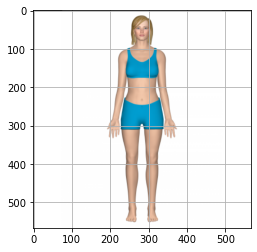

In [69]:
image_path = './images/human.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid();

In [54]:
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [53]:
image.shape

(567, 567, 3)

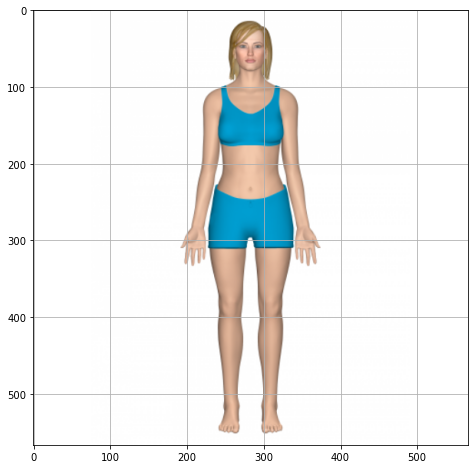

In [55]:
image_path = './images/human.png'
plot_img(cv2.imread(image_path), axis=True, grid=True)

In [100]:
image = common.read_imgfile(image_path, None, None)

In [101]:
image.shape

(567, 567, 3)

In [102]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [138]:
e.heatMat.shape

(184, 216, 19)

In [140]:
e.heatMat[0][0]

array([-1.28088100e-03,  4.69082966e-04,  3.68213095e-03,  6.03626156e-03,
        4.08555940e-03,  1.47723779e-03,  2.88086198e-03, -1.12592345e-02,
        3.49506363e-03, -6.20823167e-03, -2.83749774e-03,  1.98407564e-03,
        2.26497045e-03,  1.62325799e-04, -2.00076029e-03, -1.03243887e-02,
        8.36716592e-03, -1.55973844e-02,  9.96347427e-01], dtype=float32)

In [141]:
e.heatMat[0][0][18]

0.9963474

Trying to find the neck base:
- around 50% of image widht (0.50 * (w/4): 108
- around 20% of image hight (020) * (h/2): 37

In [143]:
e.heatMat[37][108]

array([-6.6073413e-04,  7.0591974e-01,  9.6221846e-03,  3.7301541e-03,
        3.8217125e-03,  1.0638106e-02,  6.8716938e-04,  7.5286054e-03,
       -4.3031313e-03,  2.5702734e-03,  2.5603739e-03, -5.9107579e-03,
        2.6181331e-03, -5.0535141e-03, -4.3077394e-03,  5.5688974e-03,
       -1.4478024e-03,  3.0068383e-03,  2.7737483e-01], dtype=float32)

In [145]:
e.heatMat[37][108].max()

0.70591974

<img src='../openpose.png'>

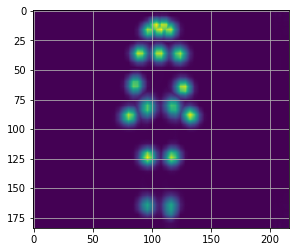

In [148]:
max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(max_prob)
plt.grid();

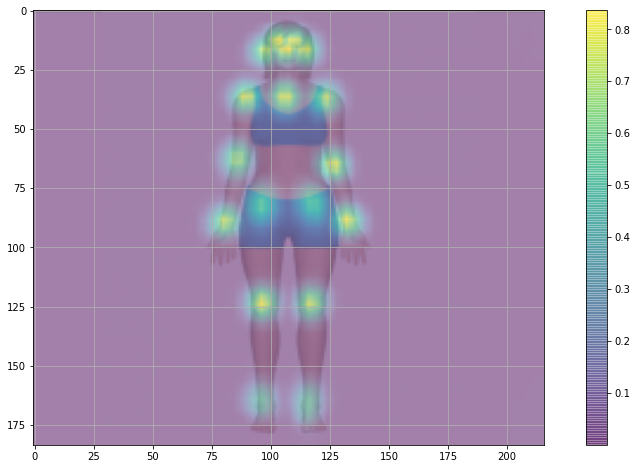

In [158]:
plt.figure(figsize=(15,8))
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
plt.imshow(bgimg, alpha=0.5)
plt.imshow(max_prob, alpha=0.5)
plt.colorbar()
plt.grid();

In [155]:
e.pafMat.shape

(184, 216, 38)

In [153]:
e.pafMat.transpose((2, 0, 1)).shape

(38, 184, 216)

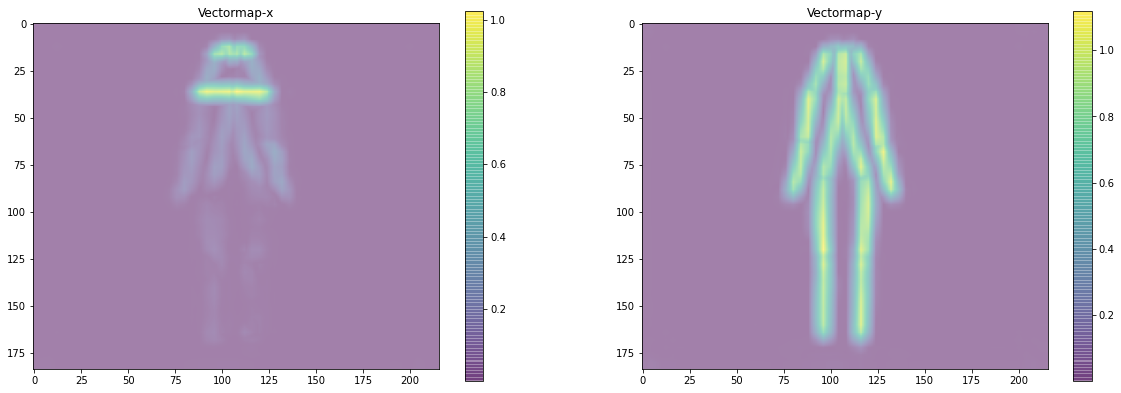

In [157]:
tmp2 = e.pafMat.transpose((2, 0, 1))
tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)

fig = plt.figure(figsize=(20,15))

a = fig.add_subplot(2, 2, 3)
a.set_title('Vectormap-x')
plt.imshow(tmp2_odd, alpha=0.5)
plt.colorbar()

a = fig.add_subplot(2, 2, 4)
a.set_title('Vectormap-y')
plt.imshow(tmp2_even, alpha=0.5)
plt.colorbar()
plt.show()

### Using method draw_humans

In [20]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

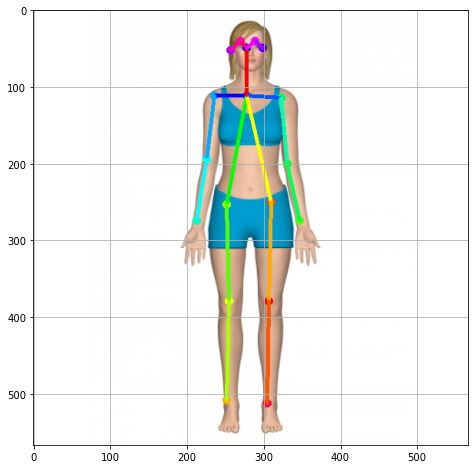

In [21]:
plot_img(image, axis=True, grid=True)

### Draw only Skeleton

2020-08-01 15:58:00,438 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


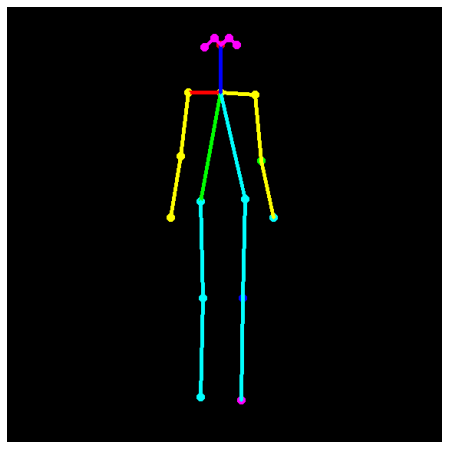

In [159]:
image = common.read_imgfile(image_path, None, None)
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
black_background = np.zeros(image.shape)
skeleton = TfPoseEstimator.draw_humans(black_background, humans, imgcopy=False)
plt.figure(figsize=(15,8))
plt.imshow(skeleton);
plt.grid();      
plt.axis('off');

## Getting the Keypoints (Joints) coordinates 

In [103]:
humans

[BodyPart:0-(0.49, 0.09) score=0.79 BodyPart:1-(0.49, 0.20) score=0.75 BodyPart:2-(0.42, 0.20) score=0.74 BodyPart:3-(0.40, 0.34) score=0.62 BodyPart:4-(0.38, 0.48) score=0.68 BodyPart:5-(0.57, 0.20) score=0.67 BodyPart:6-(0.58, 0.35) score=0.71 BodyPart:7-(0.61, 0.48) score=0.77 BodyPart:8-(0.44, 0.45) score=0.61 BodyPart:9-(0.45, 0.67) score=0.73 BodyPart:10-(0.44, 0.90) score=0.48 BodyPart:11-(0.55, 0.44) score=0.56 BodyPart:12-(0.54, 0.67) score=0.68 BodyPart:13-(0.54, 0.90) score=0.49 BodyPart:14-(0.48, 0.07) score=0.76 BodyPart:15-(0.51, 0.07) score=0.72 BodyPart:16-(0.45, 0.09) score=0.65 BodyPart:17-(0.53, 0.09) score=0.73]

In [104]:
keypoints = str(str(str(humans[0]).split('BodyPart:')[1:]).split('-')).split(' score=')
len(keypoints)

19

In [105]:
keypoints_list=[]
for i in range (len(keypoints)-1): 
    pnt = keypoints[i][-11:-1]
    pnt = tuple(map(float, pnt.split(', ')))
    keypoints_list.append(pnt)

In [106]:
keypoints_list

[(0.49, 0.09),
 (0.49, 0.2),
 (0.42, 0.2),
 (0.4, 0.34),
 (0.38, 0.48),
 (0.57, 0.2),
 (0.58, 0.35),
 (0.61, 0.48),
 (0.44, 0.45),
 (0.45, 0.67),
 (0.44, 0.9),
 (0.55, 0.44),
 (0.54, 0.67),
 (0.54, 0.9),
 (0.48, 0.07),
 (0.51, 0.07),
 (0.45, 0.09),
 (0.53, 0.09)]

In [107]:
keypts_array = np.array(keypoints_list)
keypts_array = keypts_array*(image.shape[1],image.shape[0])
keypts_array = keypts_array.astype(int)
keypts_array

array([[277,  51],
       [277, 113],
       [238, 113],
       [226, 192],
       [215, 272],
       [323, 113],
       [328, 198],
       [345, 272],
       [249, 255],
       [255, 379],
       [249, 510],
       [311, 249],
       [306, 379],
       [306, 510],
       [272,  39],
       [289,  39],
       [255,  51],
       [300,  51]])

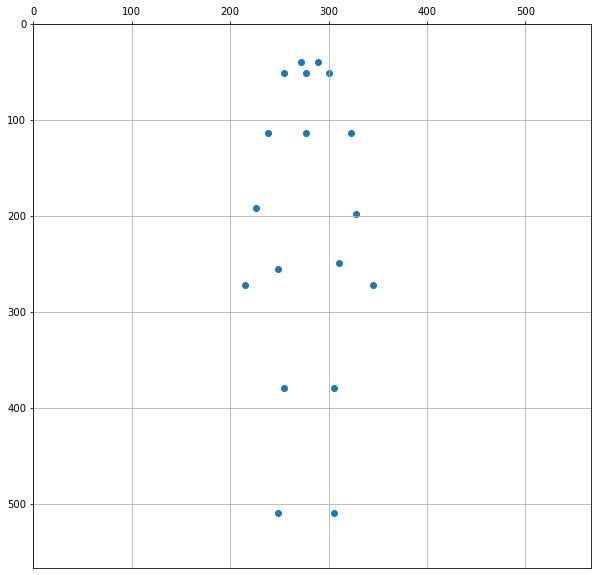

In [108]:
plt.figure(figsize=(10,10))
plt.axis([0, image.shape[1], 0, image.shape[0]])  
plt.scatter(*zip(*keypts_array))
ax=plt.gca() 
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.xaxis.tick_top() 
plt.grid();

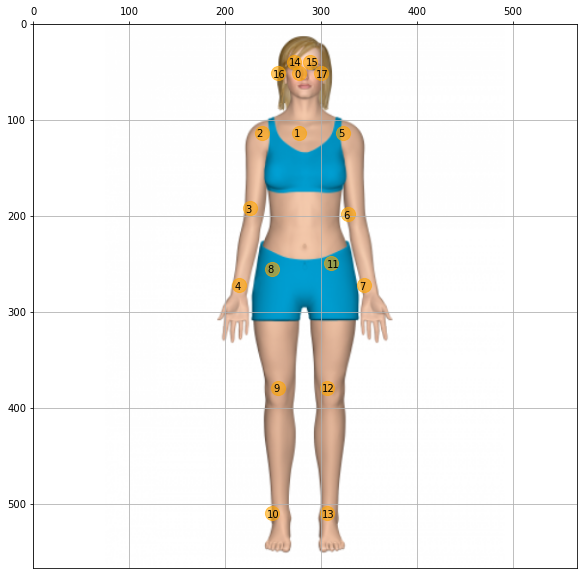

In [109]:
plt.figure(figsize=(10,10))
plt.axis([0, image.shape[1], 0, image.shape[0]])  
plt.scatter(*zip(*keypts_array), s=200, color='orange', alpha=0.6)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
ax=plt.gca() 
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.xaxis.tick_top() 
plt.grid();

for i, txt in enumerate(keypts_array):
    ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5))

### Using Functions

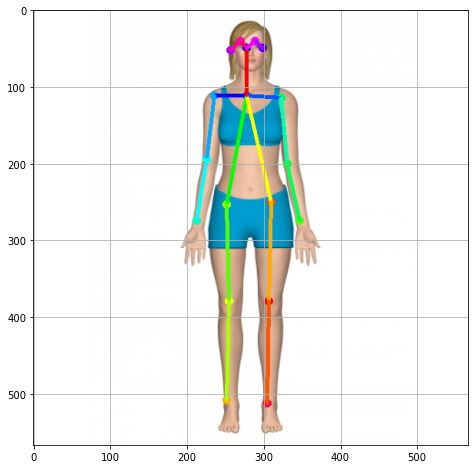

In [23]:
image_path = './images/human.png'
img, hum = get_human_pose(image_path, showBG = True)
plot_img(img, axis=True, grid=True)

2020-07-31 17:07:25,826 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


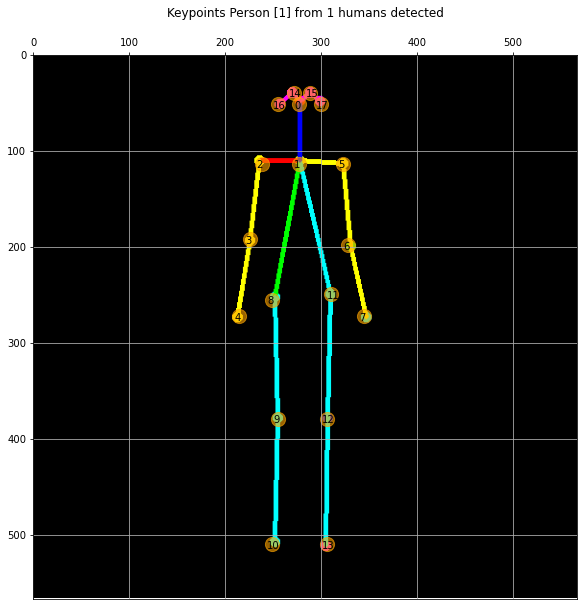

In [24]:
image_path = './images/human.png'
img, hum = get_human_pose(image_path, showBG=False)
keypoints = show_keypoints(img, hum, showBG=False)

In [25]:
keypoints

array([[277,  51],
       [277, 113],
       [238, 113],
       [226, 192],
       [215, 272],
       [323, 113],
       [328, 198],
       [345, 272],
       [249, 255],
       [255, 379],
       [249, 510],
       [311, 249],
       [306, 379],
       [306, 510],
       [272,  39],
       [289,  39],
       [255,  51],
       [300,  51]])

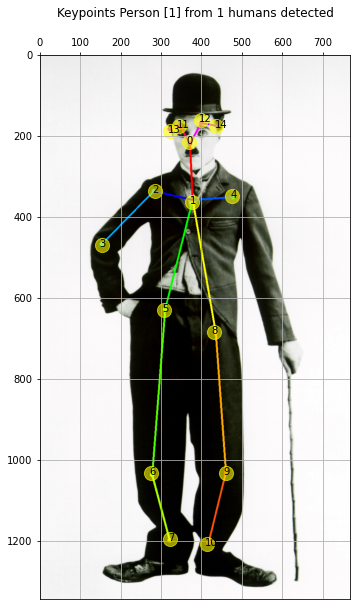

In [26]:
image_path = '../images/charlie-chaplin.jpg'
img, hum = get_human_pose(image_path)
keypoints = show_keypoints(img, hum, human=0, color='yellow')

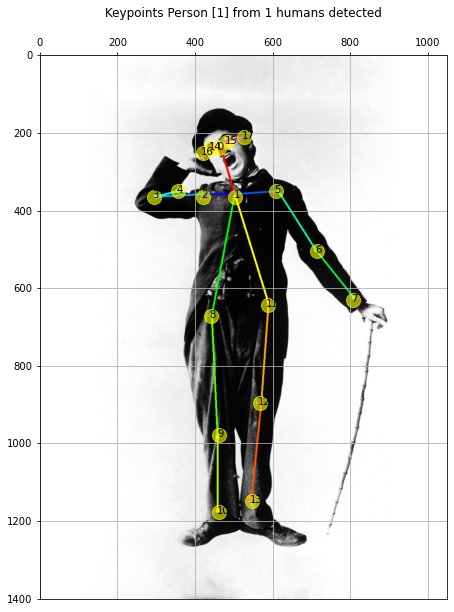

In [27]:
image_path = '../images/Charlie_Chaplin.jpg'
img, hum = get_human_pose(image_path)
keypoints = show_keypoints(img, hum, color='yellow')

2020-07-31 17:07:30,813 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


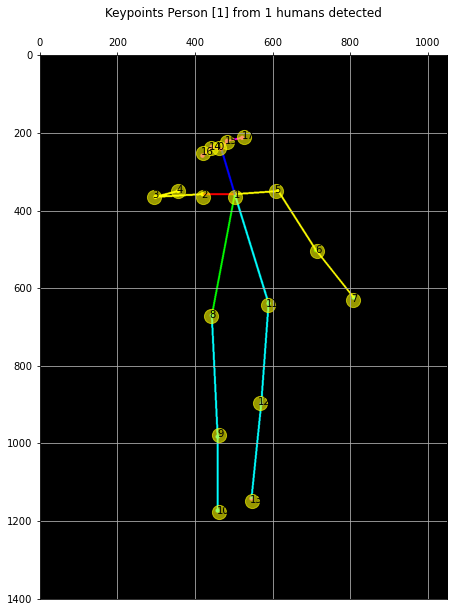

In [28]:
image_path = '../images/Charlie_Chaplin.jpg'
img, hum = get_human_pose(image_path, showBG=False)
keypoints = show_keypoints(img, hum, color='yellow', showBG=False)

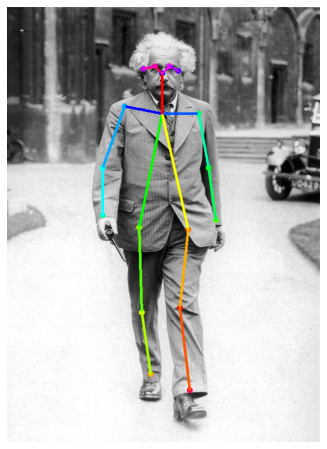

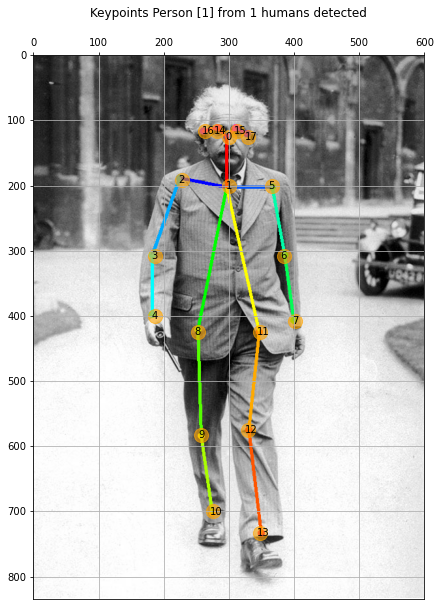

In [29]:
image_path = '../images/einstein_oxford.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False, grid=False)
keypoints = show_keypoints(img, hum)

2020-07-31 17:07:37,703 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


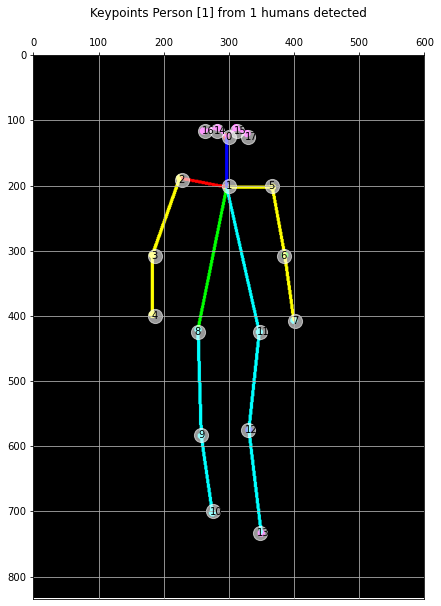

In [30]:
img, hum = get_human_pose(image_path, showBG=False)
keypoints = show_keypoints(img, hum, color='white', showBG=False)

## Studing Multiples images

In [31]:
ls ../images

Charlie_Chaplin.jpg
Einstein_Le_Corbusier_Princeton_1946.jpg
charlie-chaplin.jpg
couple-dancing.jpg
einstein_oxford.jpg
tango.jpg


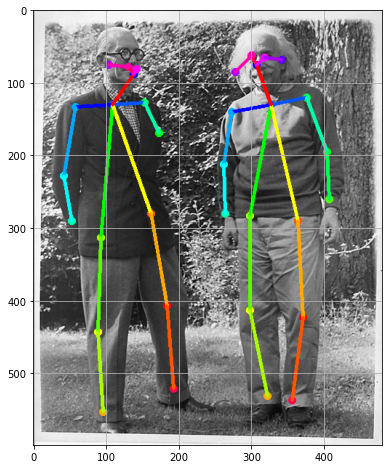

In [32]:
image_path = '../images/Einstein_Le_Corbusier_Princeton_1946.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=True, grid=True)

hum[0]

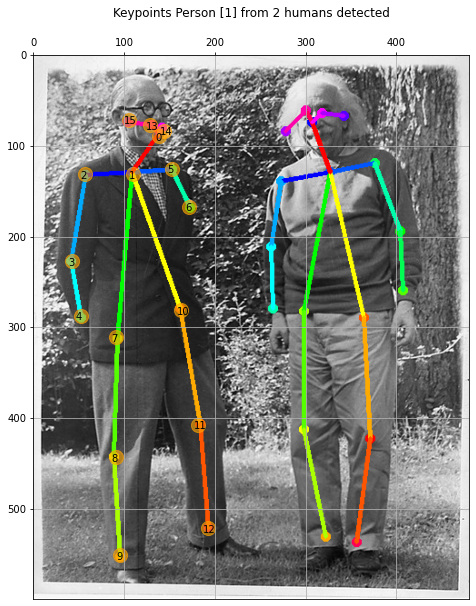

In [33]:
keypoints_1 = show_keypoints(img, hum, 1)

In [34]:
hum[1]

BodyPart:0-(0.64, 0.12) score=0.67 BodyPart:1-(0.68, 0.22) score=0.64 BodyPart:2-(0.57, 0.23) score=0.59 BodyPart:3-(0.55, 0.35) score=0.56 BodyPart:4-(0.55, 0.47) score=0.66 BodyPart:5-(0.78, 0.20) score=0.58 BodyPart:6-(0.84, 0.33) score=0.55 BodyPart:7-(0.85, 0.43) score=0.67 BodyPart:8-(0.62, 0.47) score=0.41 BodyPart:9-(0.62, 0.69) score=0.49 BodyPart:10-(0.67, 0.89) score=0.41 BodyPart:11-(0.76, 0.48) score=0.37 BodyPart:12-(0.77, 0.71) score=0.50 BodyPart:13-(0.74, 0.90) score=0.43 BodyPart:14-(0.62, 0.10) score=0.69 BodyPart:15-(0.66, 0.11) score=0.73 BodyPart:16-(0.58, 0.14) score=0.29 BodyPart:17-(0.71, 0.11) score=0.58

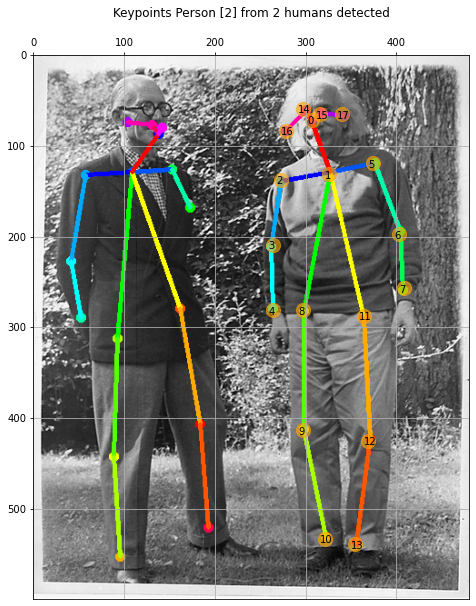

In [35]:
keypoints_2 = show_keypoints(img, hum, 2)

### Several People

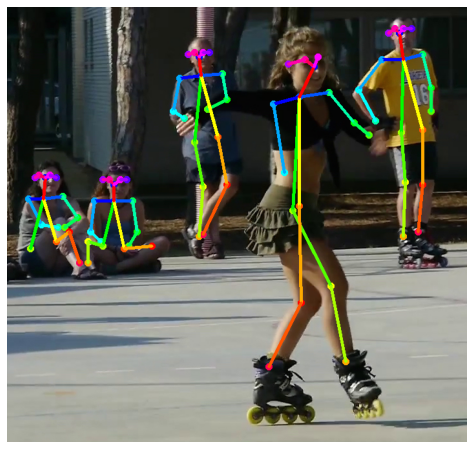

In [36]:
image_path = './images/ski.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False)

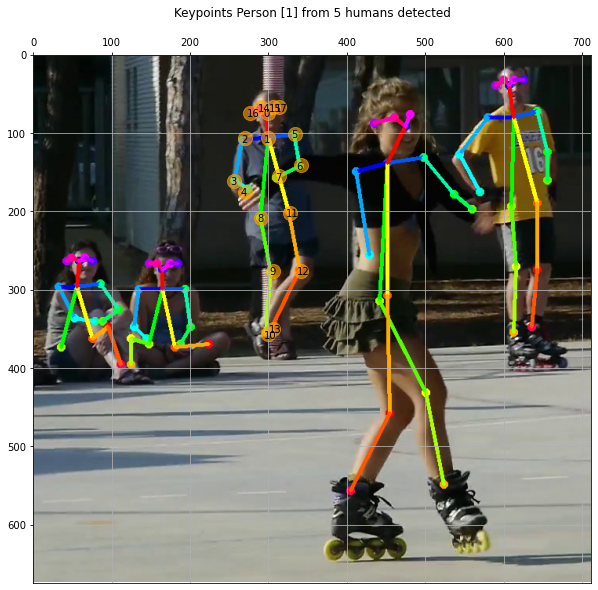

In [37]:
keypoints_1 = show_keypoints(img, hum, 1)

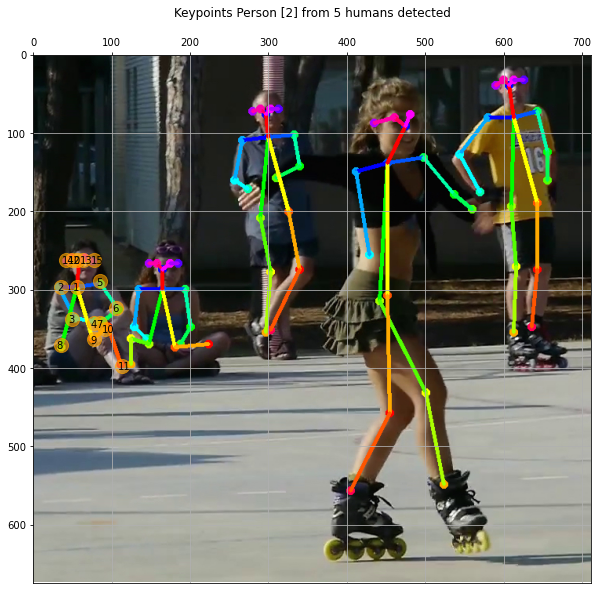

In [38]:
keypoints_2 = show_keypoints(img, hum, 2)

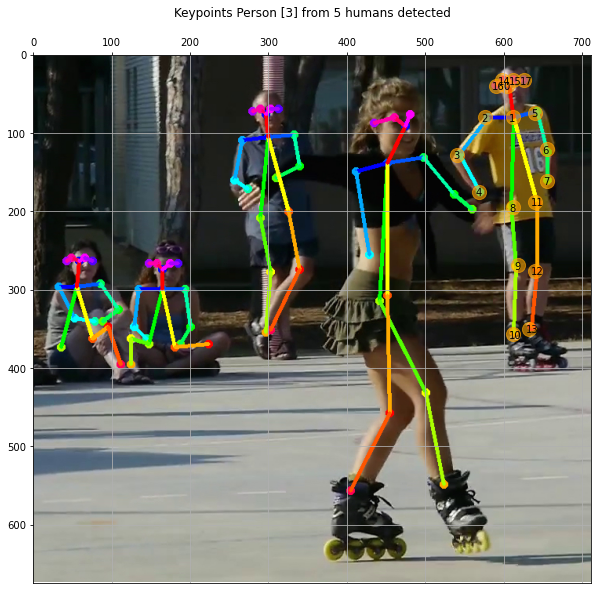

In [39]:
keypoints_3 = show_keypoints(img, hum, 3)

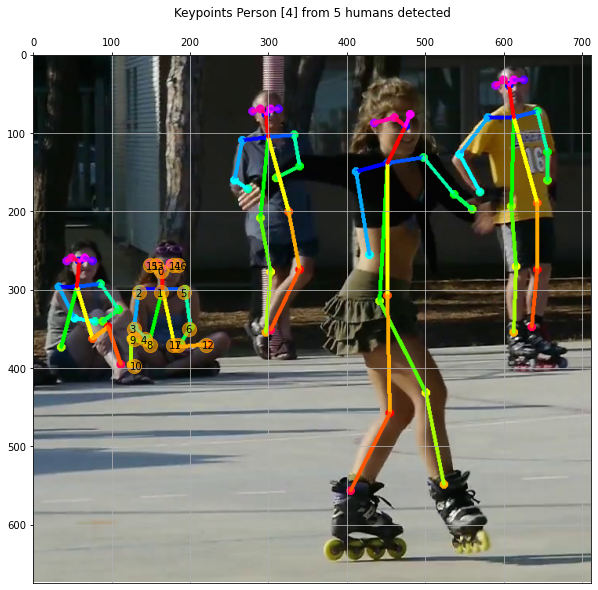

In [40]:
keypoints_4 = show_keypoints(img, hum, 4)

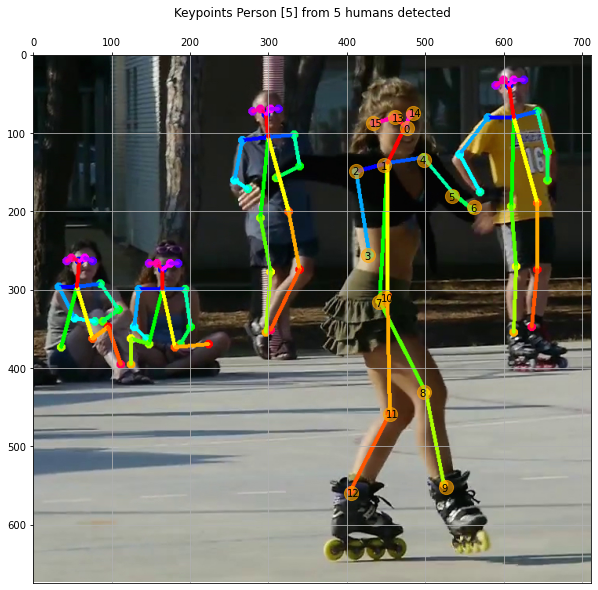

In [41]:
keypoints_5 = show_keypoints(img, hum, 5)

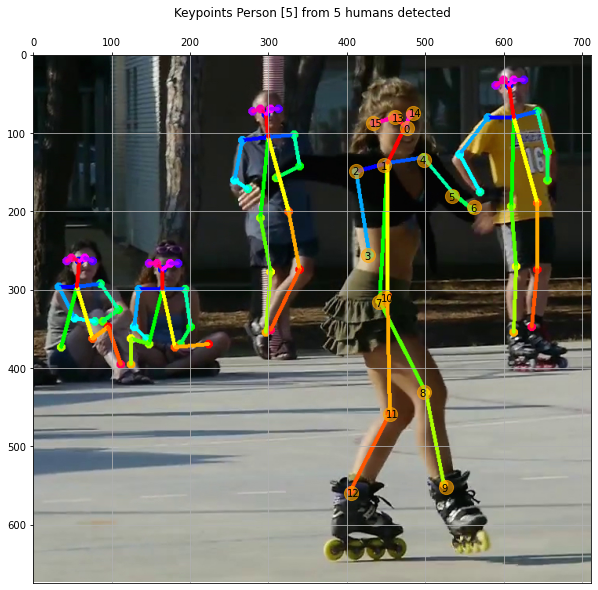

In [42]:
keypoints_5 = show_keypoints(img, hum, 5)

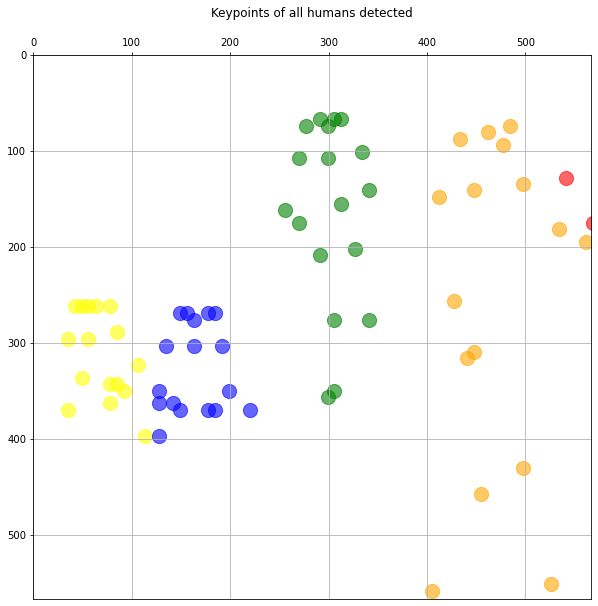

In [43]:
plt.figure(figsize=(10,10))
plt.axis([0, image.shape[1], 0, image.shape[0]])  
plt.scatter(*zip(*keypoints_1), s=200, color='green', alpha=0.6)
plt.scatter(*zip(*keypoints_2), s=200, color='yellow', alpha=0.6)
plt.scatter(*zip(*keypoints_3), s=200, color='red', alpha=0.6)
plt.scatter(*zip(*keypoints_4), s=200, color='blue', alpha=0.6)
plt.scatter(*zip(*keypoints_5), s=200, color='orange', alpha=0.6)
ax=plt.gca() 
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.xaxis.tick_top() 
plt.title('Keypoints of all humans detected\n')
plt.grid();

### Dancing

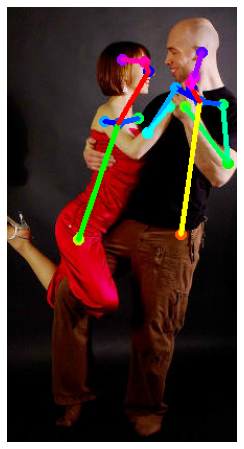

In [44]:
image_path = '../images/tango.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False)

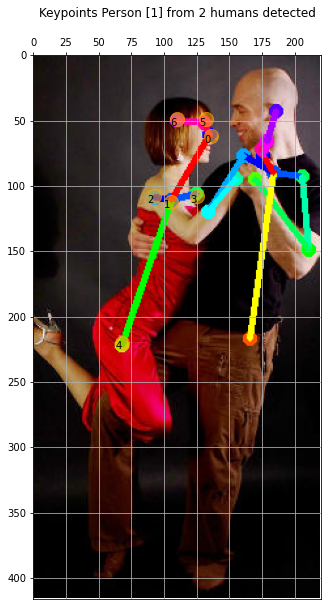

In [45]:
keypoints_1 = show_keypoints(img, hum, 1)

In [46]:
ls ../images

Charlie_Chaplin.jpg
Einstein_Le_Corbusier_Princeton_1946.jpg
charlie-chaplin.jpg
couple-dancing.jpg
einstein_oxford.jpg
tango.jpg


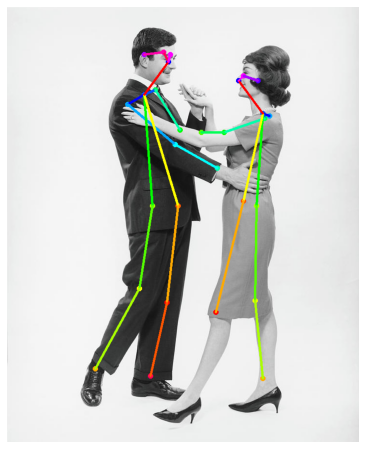

In [160]:
image_path = '../images/couple-dancing.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False)

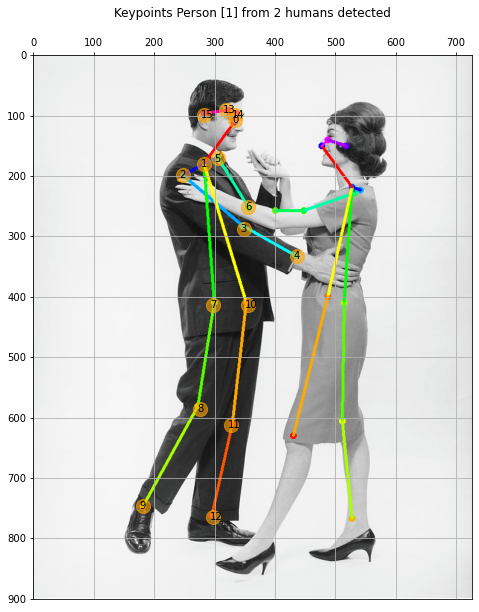

In [47]:
image_path = '../images/couple-dancing.jpg'
img, hum = get_human_pose(image_path)
keypoints_1 = show_keypoints(img, hum, 1)

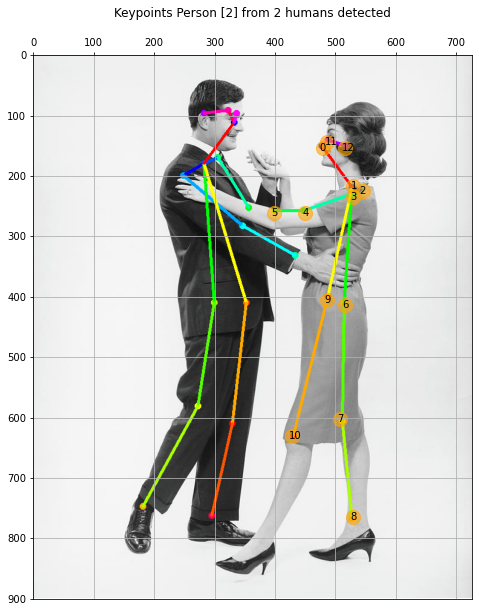

In [48]:
keypoints_2 = show_keypoints(img, hum, 2)

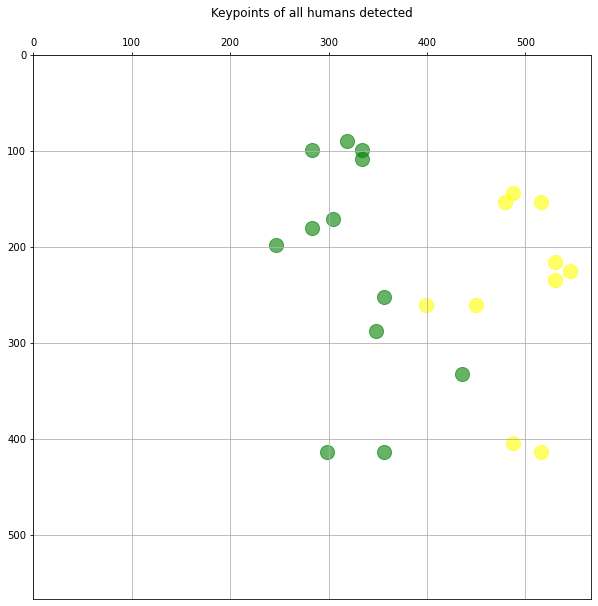

In [49]:
plt.figure(figsize=(10,10))
plt.axis([0, image.shape[1], 0, image.shape[0]])  
plt.scatter(*zip(*keypoints_1), s=200, color='green', alpha=0.6)
plt.scatter(*zip(*keypoints_2), s=200, color='yellow', alpha=0.6)
ax=plt.gca() 
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.xaxis.tick_top() 
plt.title('Keypoints of all humans detected\n')
plt.grid();

## Showing Model outputs

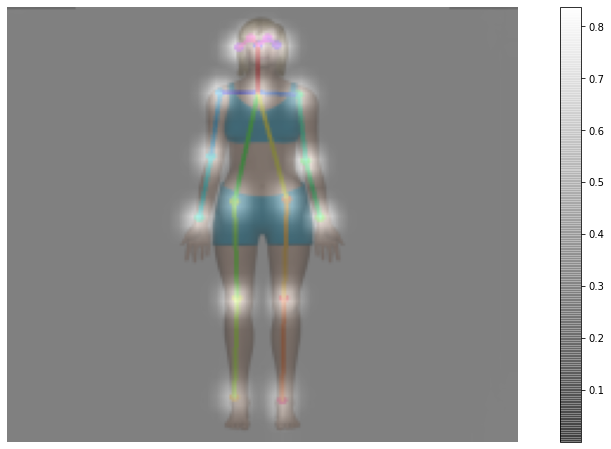

In [50]:
image_path = './images/human.png'
img, hum = get_human_pose(image_path)
show_heatmap(img)

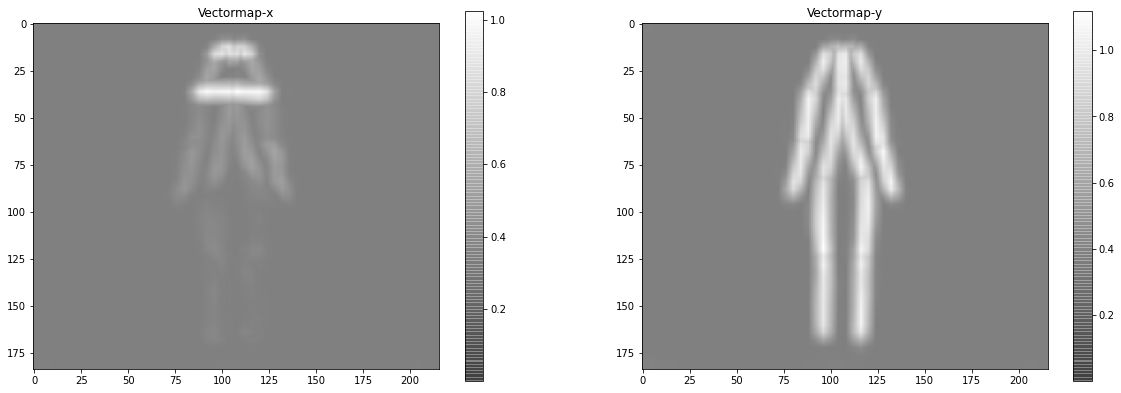

In [51]:
show_vectormaps(img)

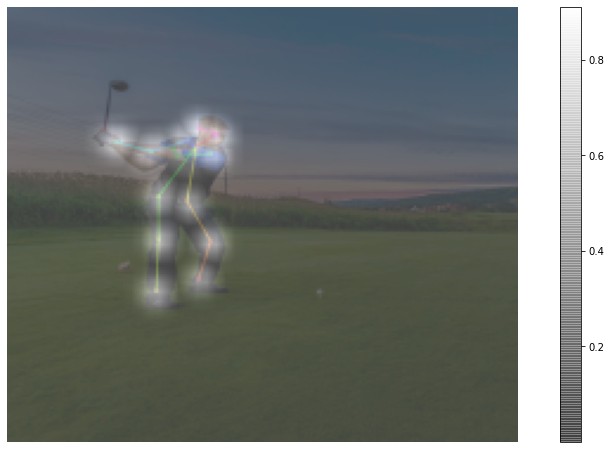

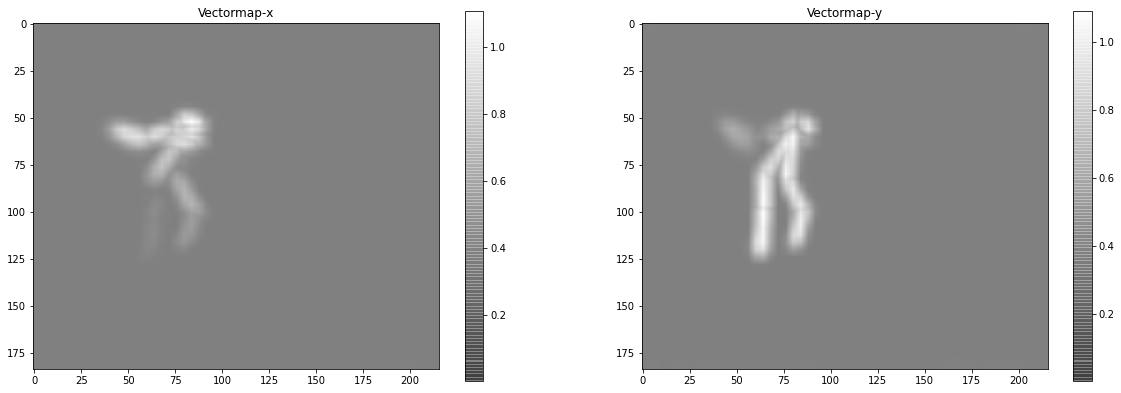

In [233]:
image_path = './images/golf.jpg'
img, hum = get_human_pose(image_path)
show_heatmap(img)
show_vectormaps(img)

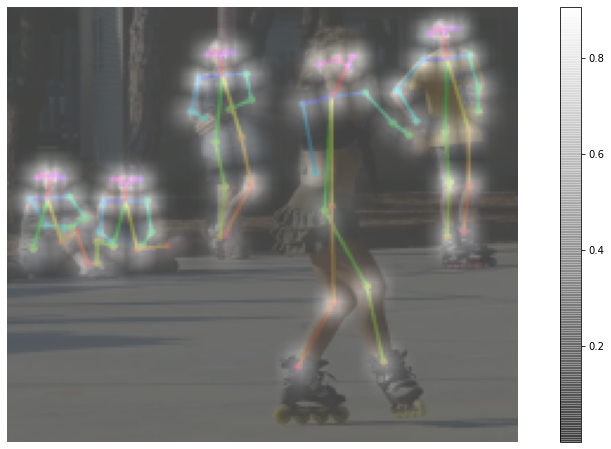

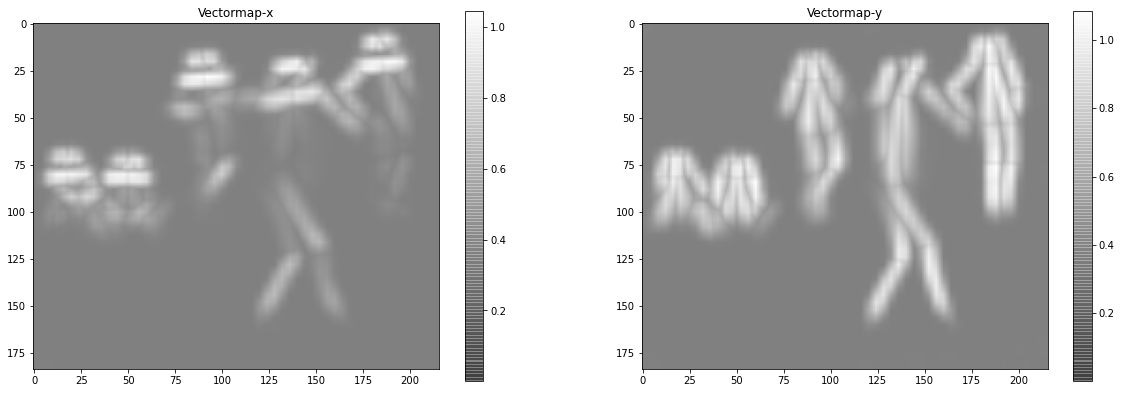

In [234]:
image_path = './images/ski.jpg'
img, hum = get_human_pose(image_path)
show_heatmap(img)
show_vectormaps(img)

## Testing with Balett Images

In [142]:
!ls ../balet/

IMG_6747.jpg IMG_6749.jpg IMG_6751.jpg IMG_6753.jpg Picture2.png
IMG_6748.jpg IMG_6750.jpg IMG_6752.jpg Picture1.png


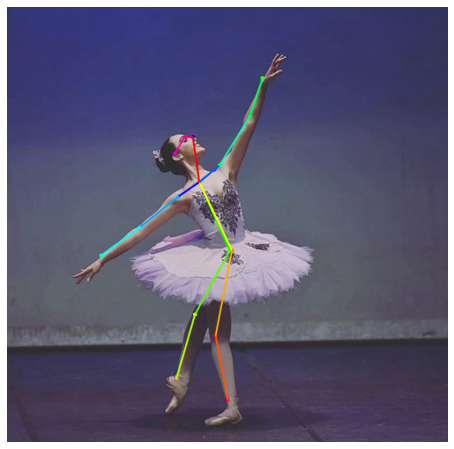

In [242]:
image_path = '../balet/IMG_6747.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False)

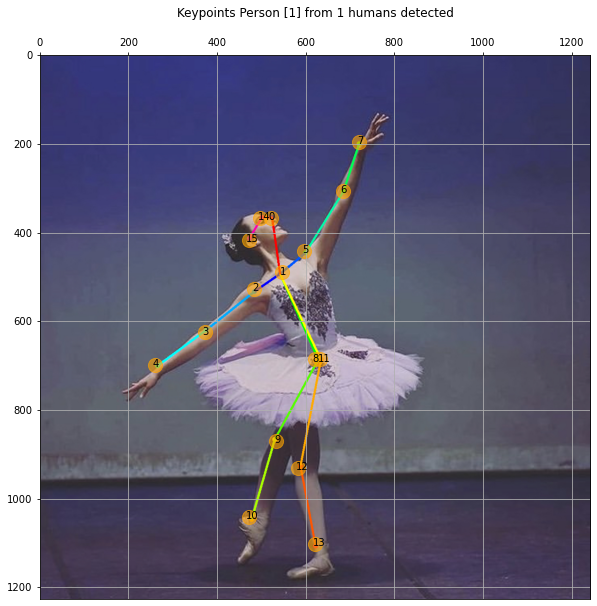

In [240]:
_ = show_keypoints(img, hum)

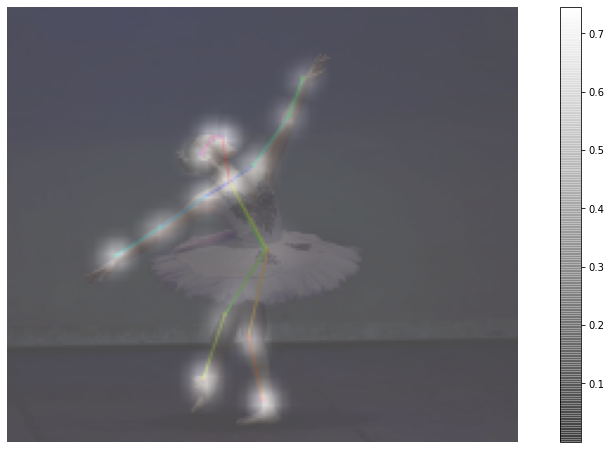

In [243]:
show_heatmap(img)

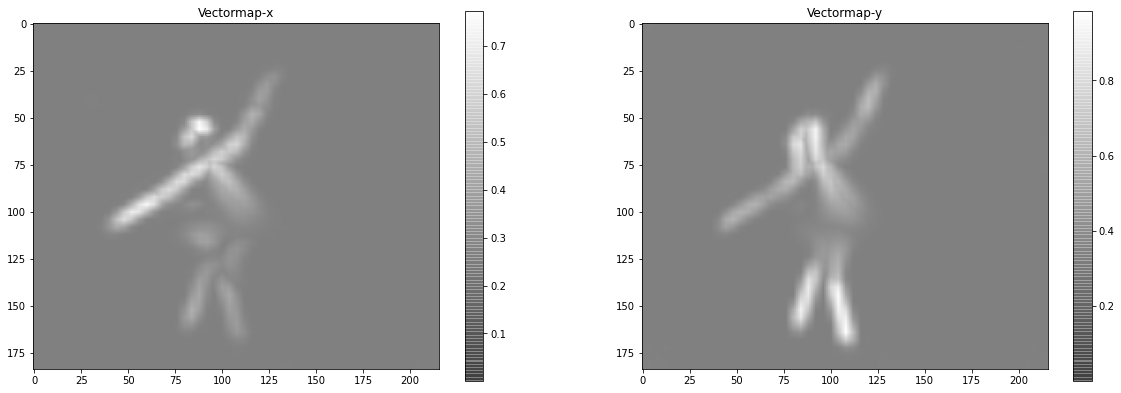

In [244]:
show_vectormaps(img)

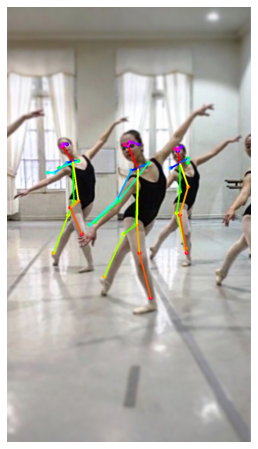

In [241]:
image_path = '../balet/IMG_6751.jpg'
img, hum = get_human_pose(image_path)
plot_img(img, axis=False)